100%|██████████| 26421880/26421880 [00:02<00:00, 11819968.11it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 208218.20it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3886117.07it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5223095.55it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Data loaded successfully...


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[epoch 1, iter   200] loss: 1.019
[epoch 1, iter   400] loss: 0.612
[epoch 1, iter   600] loss: 0.531
[epoch 1, iter   800] loss: 0.470


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch 1: train_acc 85.062, test_acc 84.190
[epoch 2, iter   200] loss: 0.414
[epoch 2, iter   400] loss: 0.384
[epoch 2, iter   600] loss: 0.381
[epoch 2, iter   800] loss: 0.368
epoch 2: train_acc 86.522, test_acc 85.320
[epoch 3, iter   200] loss: 0.332
[epoch 3, iter   400] loss: 0.328
[epoch 3, iter   600] loss: 0.320
[epoch 3, iter   800] loss: 0.302
epoch 3: train_acc 89.043, test_acc 87.370
[epoch 4, iter   200] loss: 0.295
[epoch 4, iter   400] loss: 0.297
[epoch 4, iter   600] loss: 0.289
[epoch 4, iter   800] loss: 0.275
epoch 4: train_acc 90.237, test_acc 89.030
[epoch 5, iter   200] loss: 0.262
[epoch 5, iter   400] loss: 0.266
[epoch 5, iter   600] loss: 0.262
[epoch 5, iter   800] loss: 0.271
epoch 5: train_acc 91.405, test_acc 89.740
[epoch 6, iter   200] loss: 0.241
[epoch 6, iter   400] loss: 0.251
[epoch 6, iter   600] loss: 0.249
[epoch 6, iter   800] loss: 0.248
epoch 6: train_acc 91.542, test_acc 89.360
[epoch 7, iter   200] loss: 0.227
[epoch 7, iter   400] loss: 

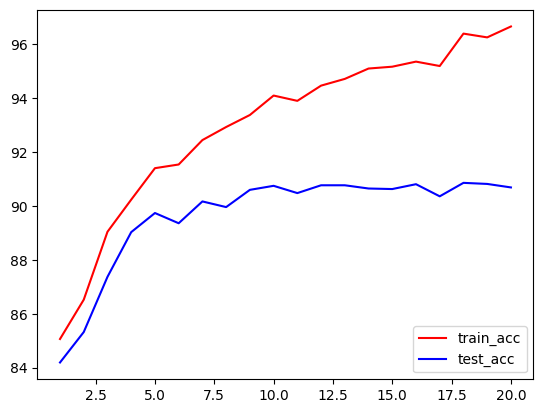

In [1]:
# Fashion MNIST Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


import torchvision as tv
import torchvision.transforms as transforms


import matplotlib.pyplot as plt
import numpy as np
import math
import os


train_batch_size = 64
test_batch_size = 1000


class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.conv1 = nn.Conv2d(1, 6, 5, stride=1, padding=2)
       self.conv2 = nn.Conv2d(6, 16, 5, stride=1, padding=0)
       self.fc1 = nn.Linear(16*5*5, 120)
       self.fc2 = nn.Linear(120, 84)
       self.fc3 = nn.Linear(84, 10)  # Change from 10 to 10 for Fashion-MNIST
   def forward(self, x):
       x = F.max_pool2d(F.relu(self.conv1(x)), 2)
       x = F.max_pool2d(F.relu(self.conv2(x)), 2)
       x = x.view(-1, self.num_flat_features(x))
       x = F.relu(self.fc1(x))
       x = F.relu(self.fc2(x))
       x = self.fc3(x)
       return x
   def num_flat_features(self, x):
       x_size = x.size()[1:]
       num = 1
       for n in x_size:
           num *= n
       return num


def load_data():
   transform = transforms.Compose([
       transforms.ToTensor(),
       transforms.Normalize((0.5,), (0.5,))  # Adjust normalization for Fashion-MNIST
   ])
   train_set = tv.datasets.FashionMNIST(
       root='./data',
       train=True,
       download=True,
       transform=transform
   )
   train_loader = torch.utils.data.DataLoader(
       train_set,
       batch_size=train_batch_size,
       shuffle=True,
       num_workers=2
   )
   test_set = tv.datasets.FashionMNIST(
       root='./data',
       train=False,
       download=True,
       transform=transform
   )
   test_loader = torch.utils.data.DataLoader(
       test_set,
       batch_size=test_batch_size,
       shuffle=False,
       num_workers=2
   )
   print("Data loaded successfully...")
   return train_loader, test_loader


def accuracy(model, x):
   with torch.no_grad():
       correct = 0
       total = 0
       for data in x:
           images, labels = data
           outputs = model(images)
           _, predicted = torch.max(outputs.data, 1)
           total += labels.size(0)
           correct += (predicted == labels).sum().item()


       return (100 * correct / total)


def train(train_loader, test_loader, model, criterion, optimizer, epoch):
   model.train()
   running_loss = 0
   for i, data in enumerate(train_loader, 0):
       inputs, labels = data
       optimizer.zero_grad()
       outputs = model(inputs)
       loss = criterion(outputs, labels)
       loss.backward()
       optimizer.step()


       running_loss += loss.item()
       if i % 200 == 199:
           print("[epoch %d, iter %5d] loss: %.3f" % (epoch+1, i+1, running_loss / 200))
           running_loss = 0.0
   train_acc = accuracy(model, train_loader)
   test_acc = accuracy(model, test_loader)
   print("epoch %d: train_acc %.3f, test_acc %.3f" % (epoch+1, train_acc, test_acc))
   return train_acc, test_acc


def display(train_acc, test_acc):
   fig, ax = plt.subplots()
   ax.plot(range(1, len(train_acc) + 1), train_acc, color='r', label='train_acc')
   ax.plot(range(1, len(test_acc) + 1), test_acc, color='b', label='test_acc')
   ax.legend(loc='lower right')
   plt.show()


if __name__ == '__main__':
   # input Fashion-MNIST
   train_loader, test_loader = load_data()
   # new model
   net = Net()


   # training
   learning_rate = 0.001
   momentum = 0.9
   max_epoch = 20
   criterion = nn.CrossEntropyLoss()
   optimizer = optim.Adam(net.parameters(), lr=learning_rate)


   train_acc = []
   test_acc = []
   for epoch in range(max_epoch):
       train_acc_t, test_acc_t = train(train_loader, test_loader, net, criterion, optimizer, epoch)
       train_acc.append(train_acc_t)
       test_acc.append(test_acc_t)


   display(train_acc, test_acc)